In [69]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from pylab import *

In [39]:
n_samples = 10000

# To generate our fabricated datset, we'll create two blobs of randomly distributed data points at two corners of the graph
centers = [(0.9, 0.05), (0.05, 0.94)]
X, y = make_blobs(n_samples = n_samples, n_features = 2, cluster_std = 0.4, centers = centers, shuffle = False, random_state = 1)

# Then filter out only the values that lie within the rangee [0, 1]
features = []
labels = []

for feature, label in zip(X, y):
    if (feature[0] >= 0 and feature[0] <= 1) and (feature[1] >= 0 and feature[1] <= 1):
        features.append(feature)
        labels.append(label)

# Then convert the results back into numpy arrays
X = np.array(features)
y = np.array(labels)

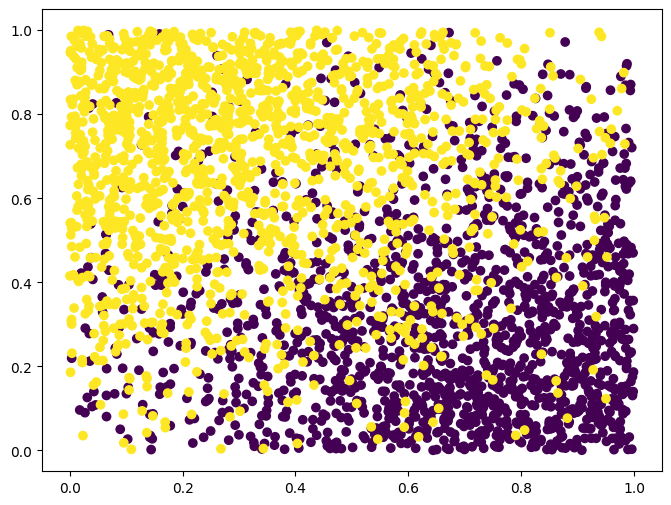

In [40]:

plt.figure(figsize = (8, 6))
plt.scatter(X[:,0], X[:,1], c = y.astype(float))
plt.show()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

We'll start with just two layers as this is a pretty simple dataset to classify.
We already know a simple linear model would do just fine, so there's no need to go "deep" on this really.

In Keras, It's super simple to set up a neural network of pretty much any topolgy you want. With just three lines of code, we'll set up a neural network with however many input nodes we need (2 in this case, for the X and Y coordinates of each point.) 32 hidden units in the middle, and a final sigmoid activation function above it all to choose one classification or the other. Sigmoid is the activation function of choice for binary classification problems such as this.

In [42]:
model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = X_train.shape[1:]))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129 (516.00 B)

 Trainable params: 129 (516.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, 
                    epochs = 500, 
                    batch_size = 100, 
                    verbose = 2, # Verbosity of 2 is the best for Jupyter Notebooks
                    validation_data = (X_test, y_test))

Epoch 1/500


25/25 - 1s - 35ms/step - accuracy: 0.5547 - loss: 0.6792 - val_accuracy: 0.6661 - val_loss: 0.6585
Epoch 2/500
25/25 - 0s - 3ms/step - accuracy: 0.7556 - loss: 0.6353 - val_accuracy: 0.7961 - val_loss: 0.6193
Epoch 3/500
25/25 - 0s - 3ms/step - accuracy: 0.8175 - loss: 0.5970 - val_accuracy: 0.8299 - val_loss: 0.5865
Epoch 4/500
25/25 - 0s - 3ms/step - accuracy: 0.8300 - loss: 0.5646 - val_accuracy: 0.8315 - val_loss: 0.5588
Epoch 5/500
25/25 - 0s - 3ms/step - accuracy: 0.8336 - loss: 0.5370 - val_accuracy: 0.8250 - val_loss: 0.5349
Epoch 6/500
25/25 - 0s - 3ms/step - accuracy: 0.8380 - loss: 0.5127 - val_accuracy: 0.8283 - val_loss: 0.5138
Epoch 7/500
25/25 - 0s - 3ms/step - accuracy: 0.8360 - loss: 0.4915 - val_accuracy: 0.8315 - val_loss: 0.4947
Epoch 8/500
25/25 - 0s - 2ms/step - accuracy: 0.8384 - loss: 0.4713 - val_accuracy: 0.8283 - val_loss: 0.4779
Epoch 9/500
25/25 - 0s - 2ms/step - accuracy: 0.8376 - loss: 0.4541 - val_accuracy: 0.8266 - val_loss: 0.4623
Epoch 10/500
25/25 - 

In [44]:
scores = model.evaluate(X_test, y_test, verbose = 1)
print("Test loss:", scores[0])
print("Test accuracy:", scores[1])

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8347 - loss: 0.3806 
Test loss: 0.3746914565563202
Test accuracy: 0.8330658078193665


In [45]:
# Make this dataset more complicated by adding more blobs
centers = [(0.9, 0.05), (0.05, 0.94), (0.3, 0.6), (0.8, 0.8)]

X, y = make_blobs(n_samples = n_samples, n_features = 2, cluster_std = 0.2, centers = centers, shuffle = False, random_state = 42)


# Then filter out only the values that lie within the rangee [0, 1]
features = []
labels = []

for feature, label in zip(X, y):
    if (feature[0] >= 0 and feature[0] <= 1) and (feature[1] >= 0 and feature[1] <= 1):
        features.append(feature)
        labels.append(label)
        

# Then convert the results back into numpy arrays
X = np.array(features)
y = np.array(labels)


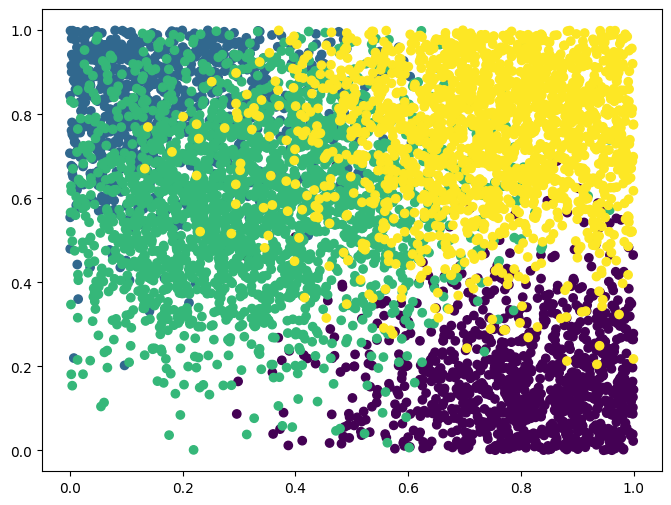

In [46]:
plt.figure(figsize = (8, 6))
plt.scatter(X[:,0], X[:,1], c = y.astype(float))
plt.show()

In [47]:
# One hot encode the labels
print(y[1])

y = keras.utils.to_categorical(y)

print(y[1])

0
[1. 0. 0. 0.]


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [49]:
model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = X_train.shape[1:]))
model.add(Dense(4, activation = 'softmax')) # Softmax is used for multi-class classification, it assigns a probability to each class

model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 228 (912.00 B)

 Trainable params: 228 (912.00 B)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [51]:
history = model.fit(X_train, y_train,
                    epochs = 500,
                    batch_size = 100,
                    verbose = 2,
                    validation_data = (X_test, y_test))

Epoch 1/500


49/49 - 1s - 26ms/step - accuracy: 0.3352 - loss: 1.2989 - val_accuracy: 0.4598 - val_loss: 1.2269
Epoch 2/500
49/49 - 0s - 2ms/step - accuracy: 0.5463 - loss: 1.1891 - val_accuracy: 0.5485 - val_loss: 1.1412
Epoch 3/500
49/49 - 0s - 2ms/step - accuracy: 0.5818 - loss: 1.0993 - val_accuracy: 0.5552 - val_loss: 1.0551
Epoch 4/500
49/49 - 0s - 2ms/step - accuracy: 0.6185 - loss: 1.0123 - val_accuracy: 0.6473 - val_loss: 0.9707
Epoch 5/500
49/49 - 0s - 2ms/step - accuracy: 0.6966 - loss: 0.9320 - val_accuracy: 0.6938 - val_loss: 0.8892
Epoch 6/500
49/49 - 0s - 2ms/step - accuracy: 0.7210 - loss: 0.8583 - val_accuracy: 0.7195 - val_loss: 0.8183
Epoch 7/500
49/49 - 0s - 2ms/step - accuracy: 0.7331 - loss: 0.7891 - val_accuracy: 0.7303 - val_loss: 0.7572
Epoch 8/500
49/49 - 0s - 2ms/step - accuracy: 0.7366 - loss: 0.7365 - val_accuracy: 0.7336 - val_loss: 0.7042
Epoch 9/500
49/49 - 0s - 2ms/step - accuracy: 0.7403 - loss: 0.6899 - val_accuracy: 0.7444 - val_loss: 0.6581
Epoch 10/500
49/49 - 

In [52]:
scores = model.evaluate(X_test, y_test, verbose = 1)
print("Test loss:", scores[0])
print("Test accuracy:", scores[1])

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8422 - loss: 0.4525 
Test loss: 0.42713209986686707
Test accuracy: 0.8390041589736938


In [53]:
# Now let's try with more hidden layers, aka deep learning
model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = X_train.shape[1:]))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(4, activation = 'softmax')) # Softmax is used for multi-class classification, it assigns a probability to each class

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 692 (2.70 KB)

 Trainable params: 692 (2.70 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [55]:
history = model.fit(X_train, y_train,
                    epochs = 500,
                    batch_size = 100,
                    verbose = 2,
                    validation_data = (X_test, y_test))

Epoch 1/500


49/49 - 2s - 33ms/step - accuracy: 0.2441 - loss: 1.3160 - val_accuracy: 0.4008 - val_loss: 1.2082
Epoch 2/500
49/49 - 0s - 2ms/step - accuracy: 0.4996 - loss: 1.1362 - val_accuracy: 0.5037 - val_loss: 1.0514
Epoch 3/500
49/49 - 0s - 2ms/step - accuracy: 0.6418 - loss: 0.9754 - val_accuracy: 0.6606 - val_loss: 0.9077
Epoch 4/500
49/49 - 0s - 2ms/step - accuracy: 0.6957 - loss: 0.8459 - val_accuracy: 0.6838 - val_loss: 0.7951
Epoch 5/500
49/49 - 0s - 2ms/step - accuracy: 0.7100 - loss: 0.7413 - val_accuracy: 0.6996 - val_loss: 0.7011
Epoch 6/500
49/49 - 0s - 2ms/step - accuracy: 0.7188 - loss: 0.6665 - val_accuracy: 0.7369 - val_loss: 0.6318
Epoch 7/500
49/49 - 0s - 2ms/step - accuracy: 0.7619 - loss: 0.6116 - val_accuracy: 0.7776 - val_loss: 0.5759
Epoch 8/500
49/49 - 0s - 2ms/step - accuracy: 0.7821 - loss: 0.5734 - val_accuracy: 0.8017 - val_loss: 0.5410
Epoch 9/500
49/49 - 0s - 2ms/step - accuracy: 0.7900 - loss: 0.5466 - val_accuracy: 0.8058 - val_loss: 0.5090
Epoch 10/500
49/49 - 

In [56]:
scores = model.evaluate(X_test, y_test, verbose = 1)
print("Test loss:", scores[0])
print("Test accuracy:", scores[1])

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.8268 - loss: 0.4541
Test loss: 0.4266211986541748
Test accuracy: 0.831535279750824


In [57]:
# Now let's try with another hidden layer
model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = X_train.shape[1:]))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'softmax')) # Softmax is used for multi-class classification, it assigns a probability to each class

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 796 (3.11 KB)

 Trainable params: 796 (3.11 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [59]:
history = model.fit(X_train, y_train,
                    epochs = 500,
                    batch_size = 100,
                    verbose = 2,
                    validation_data = (X_test, y_test))

Epoch 1/500
49/49 - 1s - 27ms/step - accuracy: 0.4857 - loss: 1.2772 - val_accuracy: 0.5809 - val_loss: 1.2077
Epoch 2/500
49/49 - 0s - 2ms/step - accuracy: 0.6268 - loss: 1.1599 - val_accuracy: 0.6747 - val_loss: 1.0816
Epoch 3/500
49/49 - 0s - 2ms/step - accuracy: 0.6870 - loss: 1.0185 - val_accuracy: 0.6705 - val_loss: 0.9247
Epoch 4/500
49/49 - 0s - 2ms/step - accuracy: 0.6966 - loss: 0.8504 - val_accuracy: 0.6871 - val_loss: 0.7557
Epoch 5/500
49/49 - 0s - 2ms/step - accuracy: 0.7194 - loss: 0.6965 - val_accuracy: 0.7187 - val_loss: 0.6310
Epoch 6/500
49/49 - 0s - 2ms/step - accuracy: 0.7316 - loss: 0.6041 - val_accuracy: 0.7344 - val_loss: 0.5517
Epoch 7/500
49/49 - 0s - 2ms/step - accuracy: 0.7665 - loss: 0.5546 - val_accuracy: 0.7809 - val_loss: 0.5157
Epoch 8/500
49/49 - 0s - 2ms/step - accuracy: 0.7829 - loss: 0.5273 - val_accuracy: 0.8158 - val_loss: 0.4719
Epoch 9/500
49/49 - 0s - 2ms/step - accuracy: 0.8028 - loss: 0.5035 - val_accuracy: 0.8224 - val_loss: 0.4690
Epoch 10/

In [60]:
scores = model.evaluate(X_test, y_test, verbose = 1)
print("Test loss:", scores[0])
print("Test accuracy:", scores[1])

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - accuracy: 0.8385 - loss: 0.4510
Test loss: 0.4267648458480835
Test accuracy: 0.8390041589736938


In [61]:
# Now let's try going wider instead of deeper
model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = X_train.shape[1:]))
model.add(Dense(4, activation = 'softmax')) # Softmax is used for multi-class classification, it assigns a probability to each class

model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 452 (1.77 KB)

 Trainable params: 452 (1.77 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [63]:
history = model.fit(X_train, y_train,
                    epochs = 500,
                    batch_size = 100,
                    verbose = 2,
                    validation_data = (X_test, y_test))

Epoch 1/500
49/49 - 1s - 17ms/step - accuracy: 0.4645 - loss: 1.2911 - val_accuracy: 0.4996 - val_loss: 1.2065
Epoch 2/500
49/49 - 0s - 2ms/step - accuracy: 0.5502 - loss: 1.1415 - val_accuracy: 0.5253 - val_loss: 1.0880
Epoch 3/500
49/49 - 0s - 2ms/step - accuracy: 0.6264 - loss: 1.0322 - val_accuracy: 0.6539 - val_loss: 0.9829
Epoch 4/500
49/49 - 0s - 2ms/step - accuracy: 0.6943 - loss: 0.9329 - val_accuracy: 0.6921 - val_loss: 0.8876
Epoch 5/500
49/49 - 0s - 2ms/step - accuracy: 0.7194 - loss: 0.8441 - val_accuracy: 0.7087 - val_loss: 0.8002
Epoch 6/500
49/49 - 0s - 2ms/step - accuracy: 0.7341 - loss: 0.7666 - val_accuracy: 0.7494 - val_loss: 0.7277
Epoch 7/500
49/49 - 0s - 2ms/step - accuracy: 0.7601 - loss: 0.7010 - val_accuracy: 0.7701 - val_loss: 0.6678
Epoch 8/500
49/49 - 0s - 2ms/step - accuracy: 0.7775 - loss: 0.6491 - val_accuracy: 0.7842 - val_loss: 0.6191
Epoch 9/500
49/49 - 0s - 2ms/step - accuracy: 0.7902 - loss: 0.6111 - val_accuracy: 0.8091 - val_loss: 0.5772
Epoch 10/

In [64]:
scores = model.evaluate(X_test, y_test, verbose = 1)
print("Test loss:", scores[0])
print("Test accuracy:", scores[1])

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.8318 - loss: 0.4553
Test loss: 0.426576167345047
Test accuracy: 0.8381742835044861


In [65]:
# Now let's try going wider and deeper
model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = X_train.shape[1:]))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(4, activation = 'softmax')) # Softmax is used for multi-class classification, it assigns a probability to each class

model.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,404 (9.39 KB)

 Trainable params: 2,404 (9.39 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [67]:
history = model.fit(X_train, y_train,
                    epochs = 500,
                    batch_size = 100,
                    verbose = 2,
                    validation_data = (X_test, y_test))

Epoch 1/500
49/49 - 1s - 22ms/step - accuracy: 0.5093 - loss: 1.2863 - val_accuracy: 0.4929 - val_loss: 1.1830
Epoch 2/500
49/49 - 0s - 4ms/step - accuracy: 0.5913 - loss: 1.0515 - val_accuracy: 0.6456 - val_loss: 0.9178
Epoch 3/500
49/49 - 0s - 2ms/step - accuracy: 0.7096 - loss: 0.7910 - val_accuracy: 0.7220 - val_loss: 0.6909
Epoch 4/500
49/49 - 0s - 2ms/step - accuracy: 0.7709 - loss: 0.6183 - val_accuracy: 0.7892 - val_loss: 0.5502
Epoch 5/500
49/49 - 0s - 2ms/step - accuracy: 0.7999 - loss: 0.5330 - val_accuracy: 0.8307 - val_loss: 0.4827
Epoch 6/500
49/49 - 0s - 2ms/step - accuracy: 0.8113 - loss: 0.4985 - val_accuracy: 0.8299 - val_loss: 0.4666
Epoch 7/500
49/49 - 0s - 2ms/step - accuracy: 0.8090 - loss: 0.4852 - val_accuracy: 0.8357 - val_loss: 0.4444
Epoch 8/500
49/49 - 0s - 2ms/step - accuracy: 0.8120 - loss: 0.4724 - val_accuracy: 0.8307 - val_loss: 0.4340
Epoch 9/500
49/49 - 0s - 2ms/step - accuracy: 0.8080 - loss: 0.4740 - val_accuracy: 0.8340 - val_loss: 0.4320
Epoch 10/

In [68]:
scores = model.evaluate(X_test, y_test, verbose = 1)
print("Test loss:", scores[0])
print("Test accuracy:", scores[1])

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.8328 - loss: 0.4613
Test loss: 0.43332260847091675
Test accuracy: 0.8390041589736938


In [70]:
# Use dropout to prevent overfitting and improve the model
model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = X_train.shape[1:]))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation = 'softmax')) # Softmax is used for multi-class classification, it assigns a probability to each class

print(model.summary())

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,404 (9.39 KB)

 Trainable params: 2,404 (9.39 KB)

 Non-trainable params: 0 (0.00 B)

None


In [71]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [72]:
history = model.fit(X_train, y_train,
                    epochs = 500,
                    batch_size = 100,
                    verbose = 2,
                    validation_data = (X_test, y_test))

Epoch 1/500
49/49 - 1s - 27ms/step - accuracy: 0.5264 - loss: 1.2512 - val_accuracy: 0.6266 - val_loss: 1.1064
Epoch 2/500
49/49 - 0s - 2ms/step - accuracy: 0.6347 - loss: 1.0016 - val_accuracy: 0.6672 - val_loss: 0.8593
Epoch 3/500
49/49 - 0s - 2ms/step - accuracy: 0.6814 - loss: 0.8068 - val_accuracy: 0.7087 - val_loss: 0.6930
Epoch 4/500
49/49 - 0s - 2ms/step - accuracy: 0.7156 - loss: 0.6958 - val_accuracy: 0.7494 - val_loss: 0.5926
Epoch 5/500
49/49 - 0s - 2ms/step - accuracy: 0.7414 - loss: 0.6325 - val_accuracy: 0.8108 - val_loss: 0.5353
Epoch 6/500
49/49 - 0s - 2ms/step - accuracy: 0.7586 - loss: 0.5896 - val_accuracy: 0.8199 - val_loss: 0.4937
Epoch 7/500
49/49 - 0s - 2ms/step - accuracy: 0.7682 - loss: 0.5669 - val_accuracy: 0.8290 - val_loss: 0.4701
Epoch 8/500
49/49 - 0s - 2ms/step - accuracy: 0.7733 - loss: 0.5509 - val_accuracy: 0.8332 - val_loss: 0.4602
Epoch 9/500
49/49 - 0s - 2ms/step - accuracy: 0.7680 - loss: 0.5509 - val_accuracy: 0.8290 - val_loss: 0.4573
Epoch 10/

In [73]:
scores = model.evaluate(X_test, y_test, verbose = 1)
print("Test loss:", scores[0])
print("Test accuracy:", scores[1])

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.8348 - loss: 0.4594
Test loss: 0.4307471811771393
Test accuracy: 0.834854781627655
